# Avacado Price Detection

## Data Description 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

1.Date - The date of the observation 2.AveragePrice - the average price of a single avocado 3.type - conventional or organic 4.year - the year 5.Region - the city or region of the observation 6.Total Volume - Total number of avocados sold 7.4046 - Total number of avocados with PLU 4046 sold 8.4225 - Total number of avocados with PLU 4225 sold 9.4770 - Total number of avocados with PLU 4770 sold

# Importing Modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [28]:
df=pd.read_csv("Avacado.csv",index_col=[0])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 14
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 165.9+ KB


In [31]:
df.shape

(1517, 13)

In [32]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

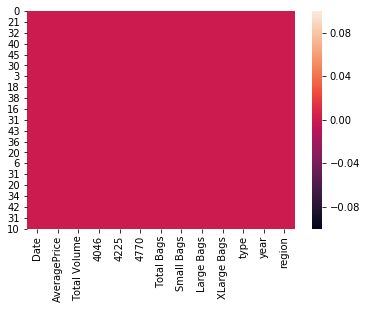

In [33]:
sns.heatmap(df.isnull())
plt.show()

We can see that there are no null values in the dataset.

In [34]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


We will break down the year column into 2 new columns i.e, Date and Month

In [41]:
df.Date=pd.to_datetime(df.Date)
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [42]:
df.drop('Date',axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


# Data Visualization

## Dependent Variable

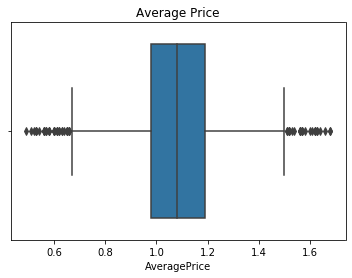

In [45]:
plt.title('Average Price')
sns.boxplot(df["AveragePrice"])
plt.show()

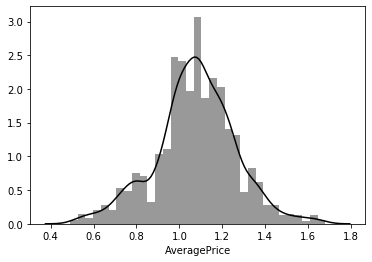

In [49]:
sns.distplot(df['AveragePrice'],color='black')
plt.show()

Here we can Observe that the boxplot is showing some Outliers but they are very near to the whiskers so we will not consider them as Outliers and the Distribution Plot is also Normally Distributed.

## Independent Variables:-

Checking In which year the sale of Avacado is most average

In [50]:
df['year'].unique()

array([2015, 2016], dtype=int64)

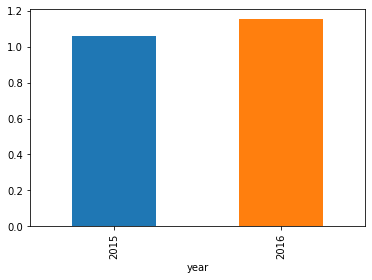

In [53]:
yr_grp=df.groupby('year').mean()
yr_grp['AveragePrice'].plot(x=df.year,kind='bar')
plt.show()

We can see that in year 2016 the sale price of avacado is comparatively more than in year 2015.

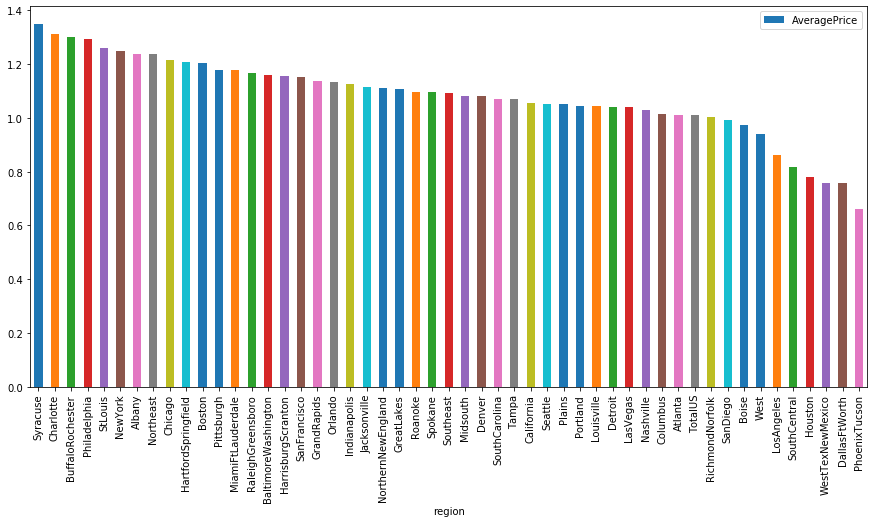

In [59]:
r_grp = df.groupby('region', as_index=False)['AveragePrice'].mean()
r_grp = r_grp.sort_values(by='AveragePrice', ascending=False)
r_grp.plot(x='region',y='AveragePrice',kind='bar',figsize=(15,7))
plt.show()

We can see that the average price is highest in Syracuse.

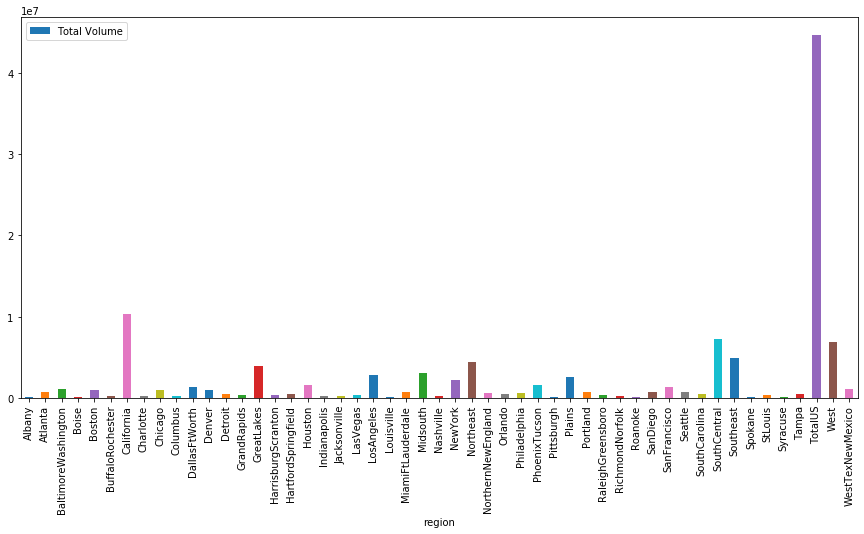

In [61]:
tv_grp=df.groupby('region',as_index=False)['Total Volume'].max()
tv_grp.plot(x='region',y='Total Volume',kind='bar',figsize=(15,7))
plt.show()

We can see that the total volume of avacado sold is maximum in the TotalUS.

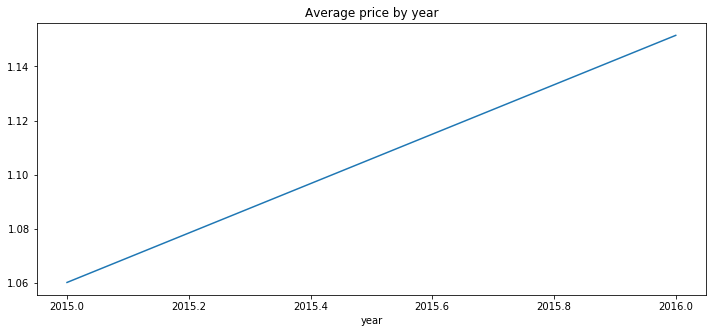

In [63]:
date_grp=df.groupby('year').mean()
ifg, ax = plt.subplots(figsize=(12,5))
date_grp['AveragePrice'].plot(x =df.year)
plt.title('Average price by year')
plt.show()

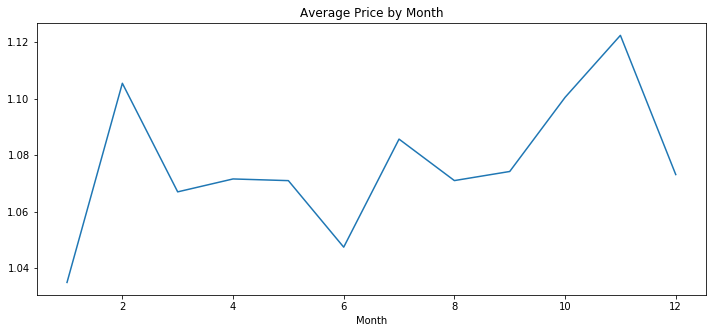

In [65]:
date_grp = df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
date_grp['AveragePrice'].plot(x =df.Month)
plt.title('Average Price by Month')
plt.show()

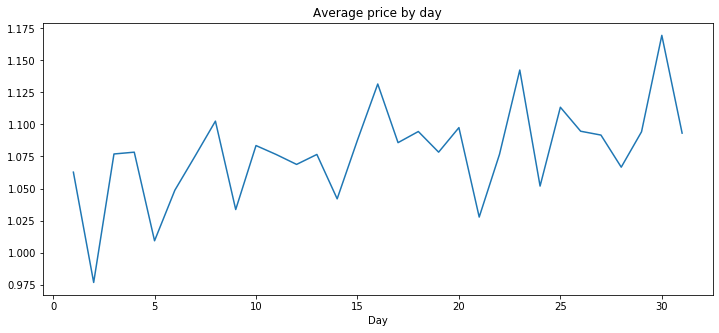

In [67]:
date_grp = df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
date_grp['AveragePrice'].plot(x = df.Day)
plt.title('Average price by day')
plt.show()

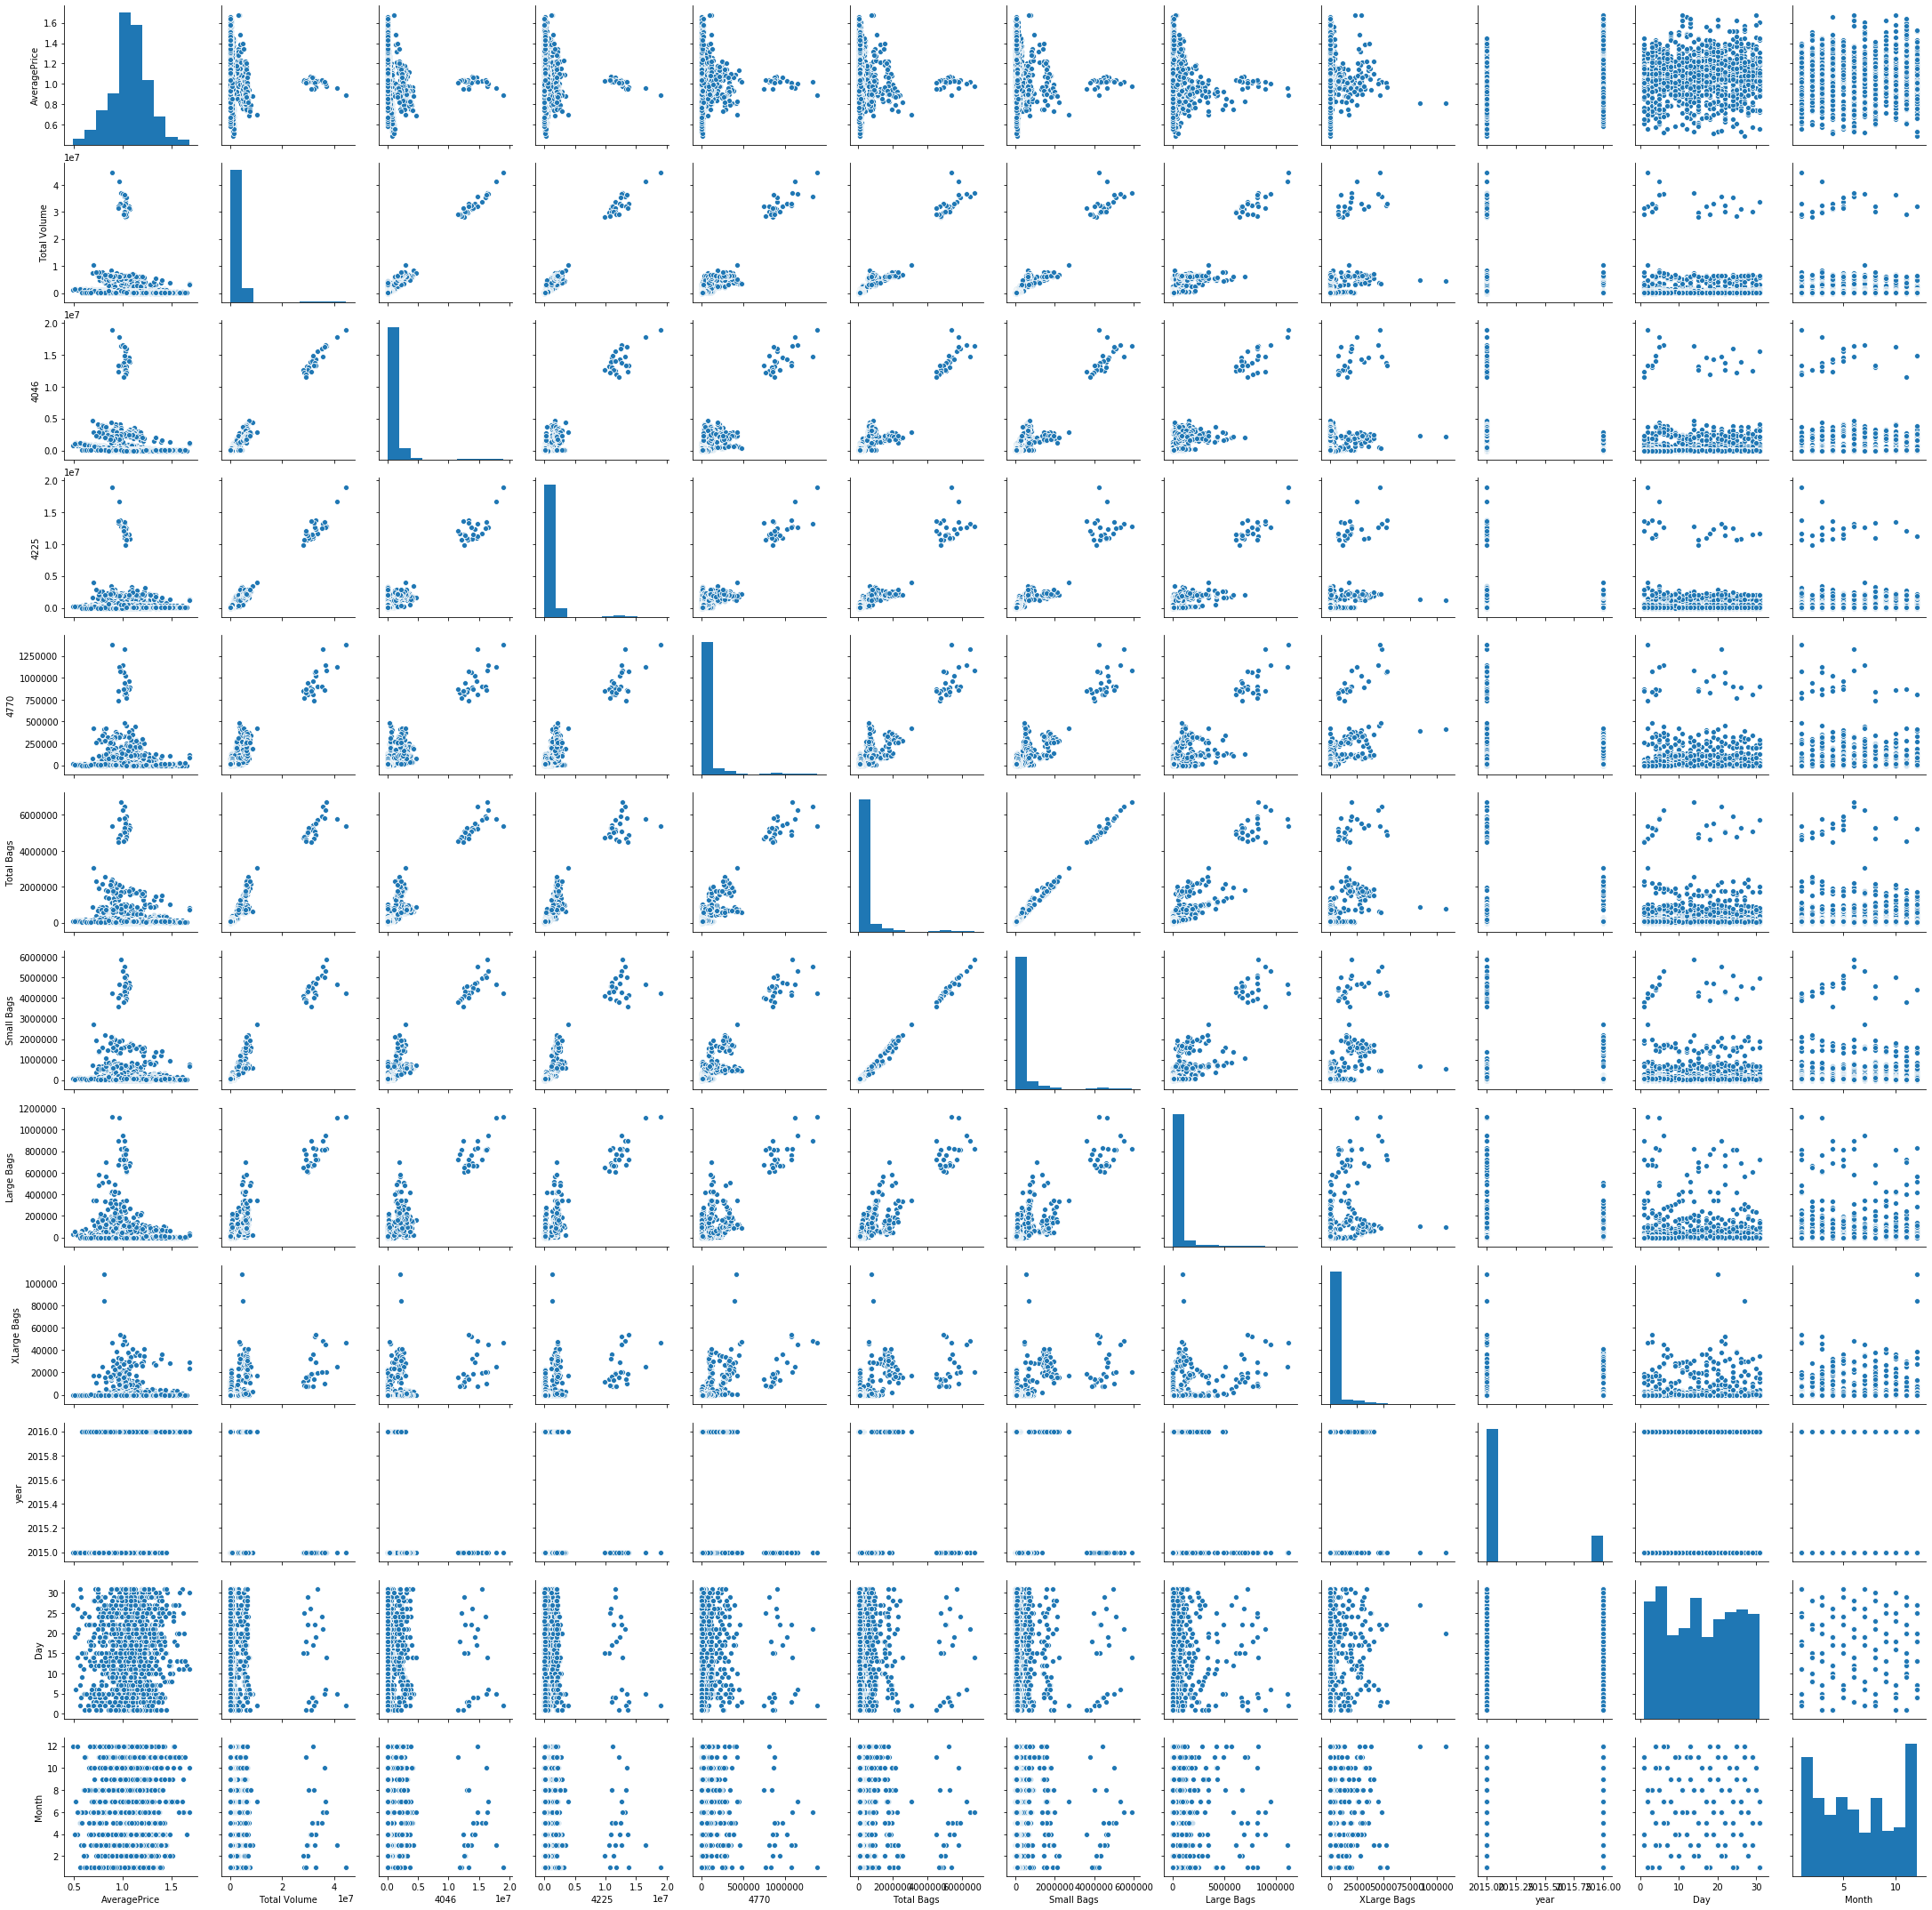

In [80]:
sns.pairplot(df)

# Data Cleaning:-

In [69]:
df["type"].unique()

array(['conventional'], dtype=object)

We can see that the type column has only a single value so we will remove it.

In [70]:
df.drop('type',axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,29,11


# Checking Correlation:-

In [71]:
corr=df.corr()

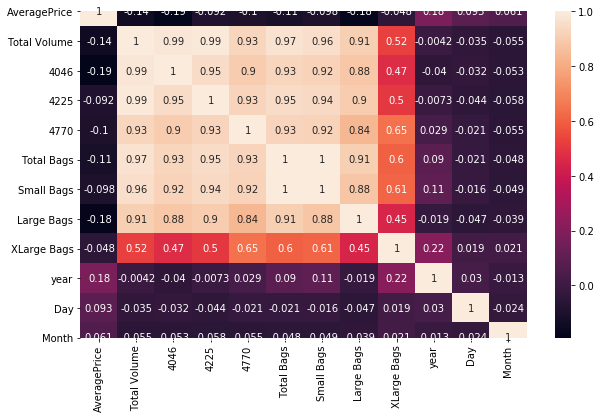

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

In [78]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
Day             0.092589
Month           0.060642
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

We can Observe that the Average Price does not have good correlation with any features.

# Checking for Outliers:-

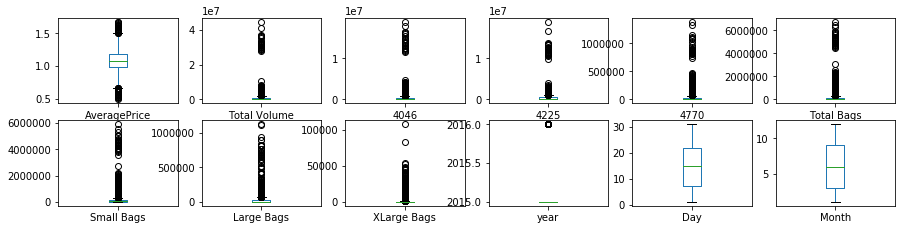

In [81]:
df.plot(kind='box',subplots=True,layout=(6,6),sharex=False,legend=False,figsize=(15,11))
plt.show()

We can see that there is Outliers in Every column . So now we will Remove the Outliers.

In [82]:
from scipy import stats
def remove_outlier(df):
    for col in df.columns:
        if((df[col].dtype == 'float64') | (df[col].dtype == 'float64')):
            percentile = df[col].quantile([0.25, 0.75]).values
            Q1 = percentile[0]
            Q3 = percentile[1]
            IQR = stats.iqr(df[col], interpolation='midpoint')
            up_lim = Q3+1.5*IQR
            low_lim = Q1-1.5*IQR
            df[col] = np.where(df[col] < low_lim, Q1, df[col])
            df[col] = np.where(df[col] > up_lim, Q3, df[col])
        else:
            df[col] = df[col]
    return df

df_new = remove_outlier(df)

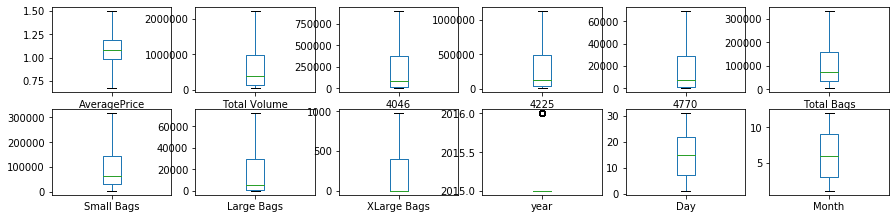

In [86]:
df_new.plot(kind='box',subplots=True,layout=(6,6),sharex=False,legend=False,figsize=(15,11))
plt.show()

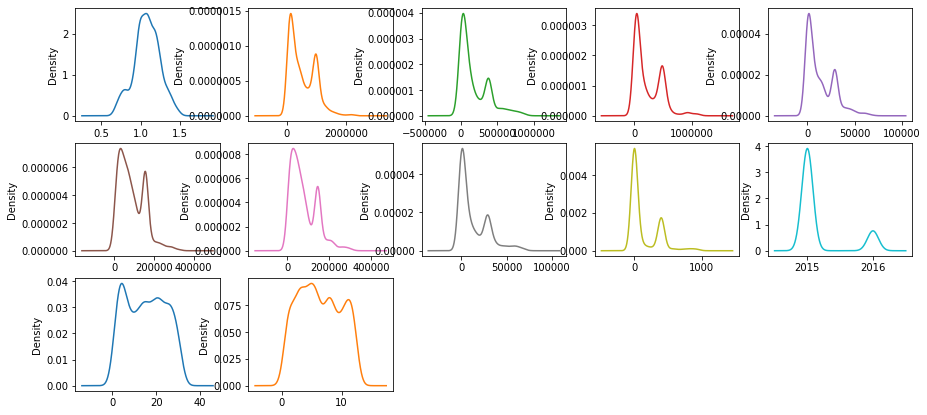

In [87]:
df_new.plot(kind='density', subplots=True, layout=(5,5), legend=False, sharex=False, figsize=(15,12))
plt.show()

In [88]:
df_new.skew()

AveragePrice   -0.126463
Total Volume    0.791720
4046            1.290157
4225            1.096937
4770            1.078070
Total Bags      0.811575
Small Bags      0.988115
Large Bags      1.299244
XLarge Bags     1.507992
year            1.828332
Day             0.041303
Month           0.101439
dtype: float64

## Converting the region column into categorical using One Hot Encoding:-

In [89]:
region = pd.get_dummies(df.region)
region

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
merge = pd.concat([df_new, region], axis='columns')
merge.drop('region', axis=1, inplace=True)
merge

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015,...,0,0,0,0,0,0,0,0,0,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015,...,0,0,0,0,0,0,0,0,0,0


# Model Building:-

In [92]:
x = merge.drop('AveragePrice', axis=1)
y= merge['AveragePrice']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=64)

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

R2: 0.6494704902393584
MAE: 0.0736079686853734
MSE: 0.009176277135939156
RMSE: 0.0957928866666996


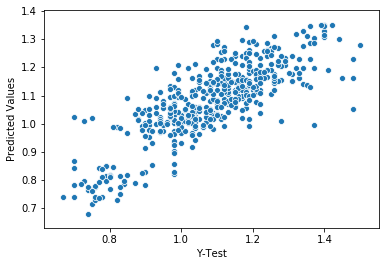

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(metrics.r2_score(y_test, predlr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

R Square: 0.4517277859944301
MAE: 0.0843201754385965
MSE: 0.014352850877192984
RMSE: 0.11980338424766215


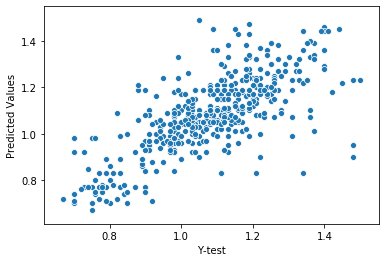

In [98]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
sns.scatterplot(y_test, preddt)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preddt)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preddt)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preddt)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preddt))))

R Square: 0.7441539487952531
MAE: 0.06144385964912281
MSE: 0.006697622324561403
RMSE: 0.08183900246558118


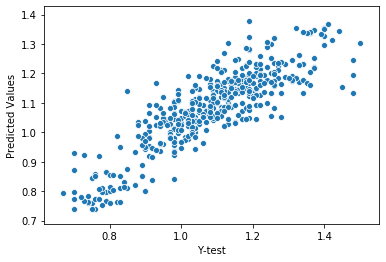

In [99]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
sns.scatterplot(y_test, predrf)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predrf)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predrf)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predrf)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predrf))))

# Performing Cross Validation

In [100]:
scr = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score for Linear Regression:", scr.mean())

Cross validation score for Linear Regression: -0.1721387805134828


In [101]:
scr = cross_val_score(dt, x, y, cv=5, scoring='r2')
print("Cross validation score for Decision Tree Regressor:", scr.mean())

Cross validation score for Decision Tree Regressor: -0.33608712110184547


In [102]:
scr = cross_val_score(rf, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.27554911236164015


The Best Score is of Random Forest Regressor So we will Select it and do HyperParameter Tuning.

# Hyper Parameter Tuning:- 

In [103]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
GCV = GridSearchCV(RandomForestRegressor(), random_grid, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 11, 14, 17, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 136, 172, 209, 245, 281, 318,
                                          354, 390, 427, 463, 500]})

In [106]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 281}

In [107]:
rfGCV = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=1, n_estimators=500)
rfGCV.fit(x_train, y_train)
predGCV = rfGCV.predict(x_test)
print('R square:', metrics.r2_score(y_test, predGCV))

R square: 0.7489219986264594


# Checking Predictions:-

In [108]:
prediction = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [109]:
prediction.round(2)

,Predictions,Real Value
4,0.83,0.75
30,1.10,1.13
41,1.08,1.00
39,1.21,1.11
36,1.07,1.08
50,1.16,1.26
27,1.06,1.07
0,1.06,1.05
38,1.06,1.11
41,0.93,0.90


# Saving our Model:-

In [113]:
import joblib
joblib.dump(rf,'avacado.pk1')

['avacado.pk1']

# Loading Our Saved Model:-

In [114]:
save = joblib.load('avacado.pkl')
prediction = save.predict(x_test)
print('R square: {}'.format(metrics.r2_score(y_test, prediction)))
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

FileNotFoundError: [Errno 2] No such file or directory: 'avacado.pkl'